In [9]:
# Import necessary libraries and data

import matplotlib.pyplot as plt
import pandas as pd
from src.model_utils import get_models
from src.validation_utils import run_kfold
from src.feature_utils import scale_features
from src.feature_utils import log_transform, ordinal_encode, scale_features

df = pd.read_csv("Stars.csv")

In [11]:
# Plot Stylization

plt.style.use("dark_background")

COLORS = {
    "pink": "#ff4ecd",
    "blue": "#4ea8ff",
    "green": "#3dff9f",
    "purple": "#b36bff"
}

In [3]:
# Apply features

df_fe = log_transform(
    df,
    columns=["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)"]
)

df_fe = ordinal_encode(df_fe)
df_fe.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3.486855,-2.619789,-0.769551,16.12,0,11,6
1,3.483159,-3.301029,-0.811916,16.60,0,11,6
2,3.414973,-3.522877,-0.991400,18.70,0,11,6
3,3.447158,-3.698968,-0.795880,16.65,0,11,6
4,3.287578,-3.860118,-0.987163,20.06,0,11,6


In [5]:
# Seperate Features from the Target

X = df_fe.drop("Star type", axis=1)
y = df_fe["Star type"]

X_scaled, scaler = scale_features(X)

In [7]:
# Ablation expirments

models = get_models()
model = models["logistic_regression"]

results = {}

for feature in X.columns:
    X_reduced = X.drop(columns=[feature])
    X_scaled_reduced, _ = scale_features(X_reduced)

    mean_acc, _ = run_kfold(
        model=model,
        X=X_scaled_reduced,
        y=y,
        k=5
    )

    results[feature] = mean_acc

results

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

{'Temperature (K)': 0.9625,
 'Luminosity(L/Lo)': 0.9666666666666668,
 'Radius(R/Ro)': 0.9125,
 'Absolute magnitude(Mv)': 0.9541666666666668,
 'Star color': 0.9625,
 'Spectral Class': 0.9791666666666666}

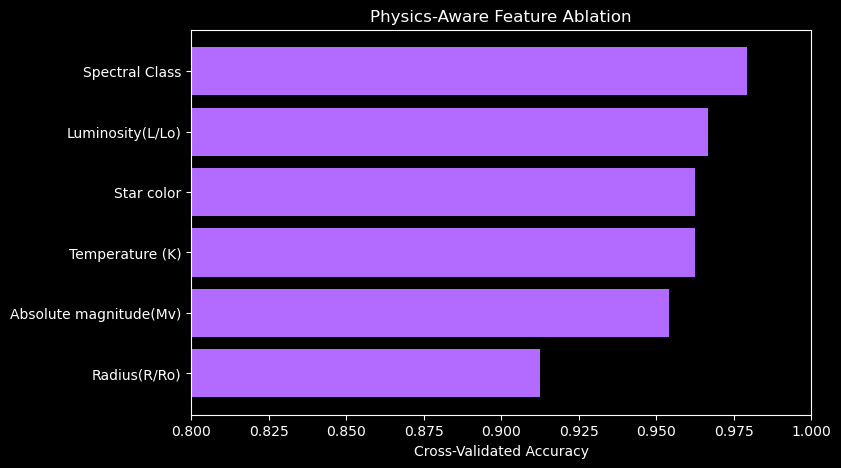

In [13]:
# Ablation graph

ablation_df = (
    pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy"])
    .sort_values("Accuracy", ascending=True)
)

plt.figure(figsize=(8, 5))
plt.barh(
    ablation_df.index,
    ablation_df["Accuracy"],
    color=COLORS["purple"]
)

plt.xlabel("Cross-Validated Accuracy")
plt.title("Physics-Aware Feature Ablation")
plt.xlim(0.8, 1.0)
plt.show()
